In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
data = pd.read_csv(filename)

# Split features and labels
X = data.drop(columns=['f_nv'])
y = data['f_nv']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Saving pv_anomaly_data.csv to pv_anomaly_data.csv
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    232418
           1       1.00      1.00      1.00      1217
           2       1.00      1.00      1.00      2103
           3       1.00      1.00      1.00      1238
           4       1.00      1.00      1.00     37784

    accuracy                           1.00    274760
   macro avg       1.00      1.00      1.00    274760
weighted avg       1.00      1.00      1.00    274760

Random Forest - Confusion Matrix:
[[232276      0      1      0    141]
 [     1   1212      0      0      4]
 [     1      0   2097      2      3]
 [     0      0      0   1238      0]
 [   151      2      3      0  37628]]


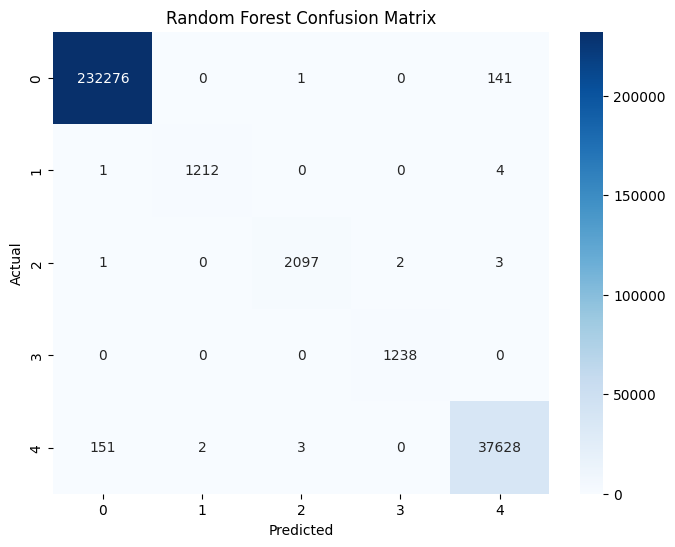

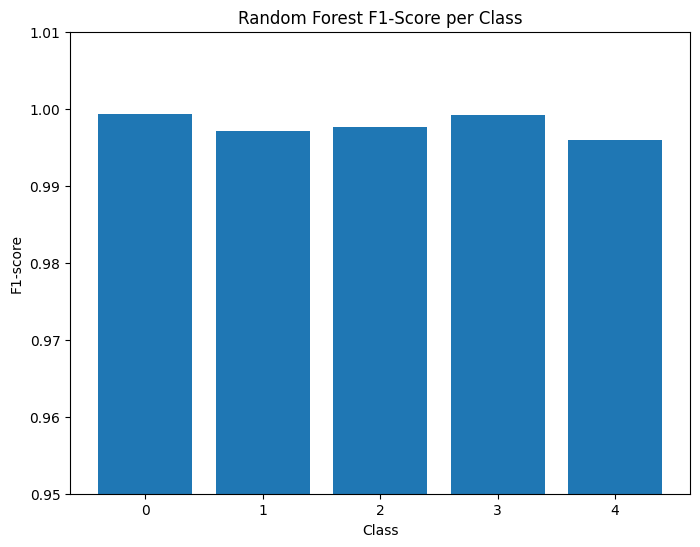

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot bar graph of per-class F1-scores
report = classification_report(y_test, y_pred_rf, output_dict=True)
f1_scores = [report[str(i)]['f1-score'] for i in sorted(y.unique())]
plt.figure(figsize=(8,6))
plt.bar(sorted(y.unique()), f1_scores)
plt.title("Random Forest F1-Score per Class")
plt.xlabel("Class")
plt.ylabel("F1-score")
plt.ylim(0.95, 1.01)
plt.show()


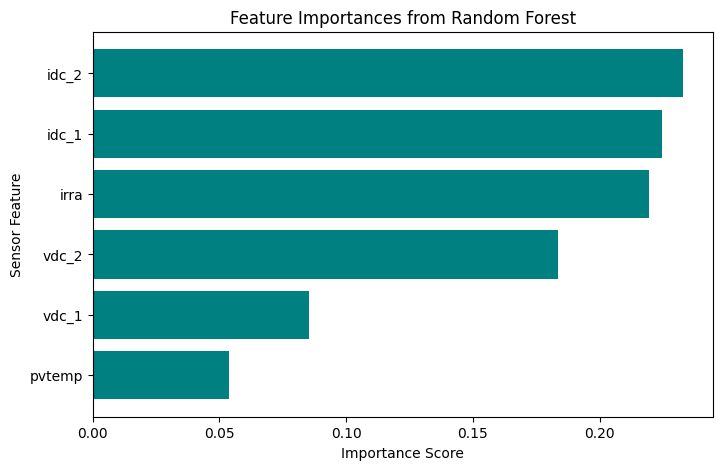

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = rf_clf.feature_importances_
feature_names = X.columns

# Put into a DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.ylabel('Sensor Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Largest at top
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
data = pd.read_csv(filename)

# Split features and labels
X = data.drop(columns=['f_nv'])
y = data['f_nv']

# First split: Train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the Random Forest model on training set
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate on validation set
y_pred_val = rf_clf.predict(X_val)
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_pred_val))
print("Validation Set - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

# Evaluate on test set
y_pred_test = rf_clf.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Test Set - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Saving pv_anomaly_data.csv to pv_anomaly_data.csv
Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174284
           1       1.00      1.00      1.00       870
           2       1.00      1.00      1.00      1569
           3       1.00      1.00      1.00       927
           4       1.00      1.00      1.00     28420

    accuracy                           1.00    206070
   macro avg       1.00      1.00      1.00    206070
weighted avg       1.00      1.00      1.00    206070

Validation Set - Confusion Matrix:
[[174177      0      1      0    106]
 [     0    868      0      0      2]
 [     2      0   1563      1      3]
 [     0      0      0    927      0]
 [   116      1      2      0  28301]]

Test Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174542
           1       1.00      1.00      1.00       8

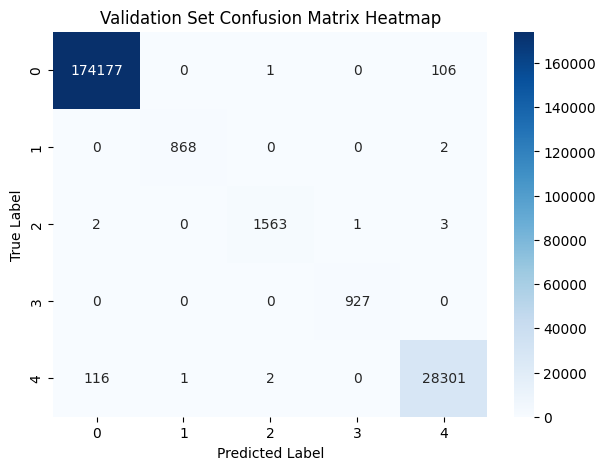

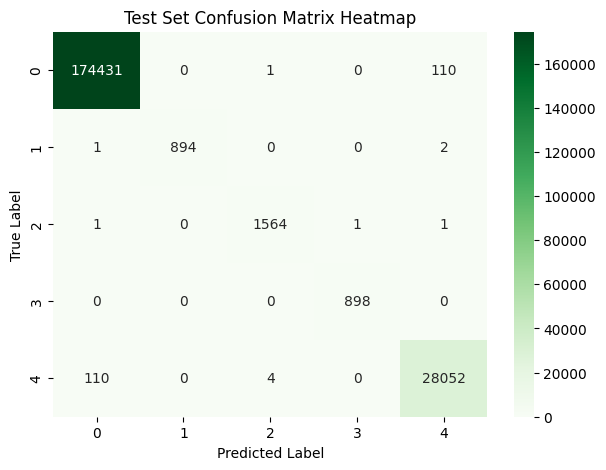

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrices you provided
cm_val = np.array([
    [174177,      0,      1,      0,    106],
    [     0,    868,      0,      0,      2],
    [     2,      0,   1563,      1,      3],
    [     0,      0,      0,    927,      0],
    [   116,      1,      2,      0,  28301]
])

cm_test = np.array([
    [174431,      0,      1,      0,    110],
    [     1,    894,      0,      0,      2],
    [     1,      0,   1564,      1,      1],
    [     0,      0,      0,    898,      0],
    [   110,      0,      4,      0,  28052]
])

labels = ['0', '1', '2', '3', '4']

# Plot validation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm_val, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Set Confusion Matrix Heatmap')
plt.show()

# Plot test heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Set Confusion Matrix Heatmap')
plt.show()
